In [13]:
# import dependancies
from config import password, user_name, api_key
import json
from pprint import pprint
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# determine the url for the api
url = 'https://api.rainforestapi.com/request'

In [3]:
# set up the request parameters
params = {
  'api_key': api_key,
  'type': 'bestsellers',
  'amazon_domain': 'amazon.ca',
  'category_id': 'bestsellers_electronics',
  'max_page': '5'
}

In [4]:
# make the http GET request to Rainforest API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    # Process the JSON response
    print(data)
else:
    print('Error:', response.status_code)

{'request_info': {'success': True, 'credits_used': 2, 'credits_used_this_request': 2, 'credits_remaining': 498, 'credits_reset_at': '2024-05-18T23:56:33.000Z'}, 'request_parameters': {'type': 'bestsellers', 'amazon_domain': 'amazon.ca', 'category_id': 'bestsellers_electronics', 'max_page': '5'}, 'request_metadata': {'created_at': '2024-04-18T23:58:05.977Z', 'processed_at': '2024-04-18T23:58:15.851Z', 'total_time_taken': 9.87, 'pages': [{'created_at': '2024-04-18T23:58:05.977Z', 'processed_at': '2024-04-18T23:58:13.475Z', 'total_time_taken': 7.5, 'page': 1, 'amazon_url': 'https://www.amazon.ca/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0'}, {'created_at': '2024-04-18T23:58:13.476Z', 'processed_at': '2024-04-18T23:58:15.851Z', 'total_time_taken': 2.38, 'page': 2, 'amazon_url': 'https://www.amazon.ca/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0?pg=2'}]}, 'bestsellers': [{'rank': 1, 'position': 1, 'title': 'All-new Amazon Fire TV Stick 4K streaming device, more th

In [5]:
# pretty print the JSON response from Rainforest API
pprint(json.dumps(response.json()))

('{"request_info": {"success": true, "credits_used": 2, '
 '"credits_used_this_request": 2, "credits_remaining": 498, '
 '"credits_reset_at": "2024-05-18T23:56:33.000Z"}, "request_parameters": '
 '{"type": "bestsellers", "amazon_domain": "amazon.ca", "category_id": '
 '"bestsellers_electronics", "max_page": "5"}, "request_metadata": '
 '{"created_at": "2024-04-18T23:58:05.977Z", "processed_at": '
 '"2024-04-18T23:58:15.851Z", "total_time_taken": 9.87, "pages": '
 '[{"created_at": "2024-04-18T23:58:05.977Z", "processed_at": '
 '"2024-04-18T23:58:13.475Z", "total_time_taken": 7.5, "page": 1, '
 '"amazon_url": '
 '"https://www.amazon.ca/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0"}, '
 '{"created_at": "2024-04-18T23:58:13.476Z", "processed_at": '
 '"2024-04-18T23:58:15.851Z", "total_time_taken": 2.38, "page": 2, '
 '"amazon_url": '
 '"https://www.amazon.ca/Best-Sellers-Electronics/zgbs/electronics/ref=zg_bs_nav_0?pg=2"}]}, '
 '"bestsellers": [{"rank": 1, "position": 1, "titl

In [6]:
# convert to pandas datframe
response_json = response.json()

# extract the 'bestsellers' data
bestsellers_data = response_json.get('bestsellers', [])

# convert the 'bestsellers' data to a DataFrame
bestsellers_df = pd.DataFrame(bestsellers_data)

# display the DataFrame
print(bestsellers_df)

    rank  position                                              title  \
0      1         1  All-new Amazon Fire TV Stick 4K streaming devi...   
1      2         2  Amazon Fire TV Stick with Alexa Voice Remote (...   
2      3         3     Apple EarPods with Lightning Connector - White   
3      4         4  All-new Amazon Fire TV Stick 4K Max streaming ...   
4      5         5  TAGRY Bluetooth Headphones 60H Playback True W...   
..   ...       ...                                                ...   
95    96        46  Bluetooth Car Adapter, WOCBUY 3.5mm AUX Blueto...   
96    97        47  JBL Tune Beam - True Wireless Noise Cancelling...   
97    98        48  UnionSine 1TB Ultra Slim Portable External Har...   
98    99        49  Monster N-Lite 203 AirLinks Wireless Earbuds, ...   
99   100        50  Seagate BarraCuda 8TB Internal Hard Drive HDD ...   

          asin                                               link  \
0   B0BXFV1R3S  https://www.amazon.ca/All-new-Amazon-s

In [7]:
# identify column names 
bestsellers_df.columns

Index(['rank', 'position', 'title', 'asin', 'link', 'image', 'rating',
       'ratings_total', 'price', 'current_category', 'parent_category',
       'page'],
      dtype='object')

In [8]:
# determine columns to drop and preview dataframe
columns_to_drop = ['position', 'asin', 'link', 'image', 'current_category', 'parent_category',
       'page']
bestsellers_df.drop(columns=columns_to_drop, inplace=True)

# print results
print(bestsellers_df)

    rank                                              title  rating  \
0      1  All-new Amazon Fire TV Stick 4K streaming devi...     4.6   
1      2  Amazon Fire TV Stick with Alexa Voice Remote (...     4.7   
2      3     Apple EarPods with Lightning Connector - White     4.5   
3      4  All-new Amazon Fire TV Stick 4K Max streaming ...     4.6   
4      5  TAGRY Bluetooth Headphones 60H Playback True W...     4.4   
..   ...                                                ...     ...   
95    96  Bluetooth Car Adapter, WOCBUY 3.5mm AUX Blueto...     4.5   
96    97  JBL Tune Beam - True Wireless Noise Cancelling...     4.1   
97    98  UnionSine 1TB Ultra Slim Portable External Har...     4.5   
98    99  Monster N-Lite 203 AirLinks Wireless Earbuds, ...     3.8   
99   100  Seagate BarraCuda 8TB Internal Hard Drive HDD ...     4.6   

    ratings_total                                              price  
0            3841  {'symbol': '$', 'value': 49.99, 'currency': 'C...  
1    

In [9]:
# display dataframe
bestsellers_df

,rank,title,rating,ratings_total,price
0,1,All-new Amazon Fire TV Stick 4K streaming devi...,4.6,3841,"{'symbol': '$', 'value': 49.99, 'currency': 'C..."
1,2,Amazon Fire TV Stick with Alexa Voice Remote (...,4.7,46709,"{'symbol': '$', 'value': 41.99, 'currency': 'C..."
2,3,Apple EarPods with Lightning Connector - White,4.5,273518,"{'symbol': '$', 'value': 24.94, 'currency': 'C..."
3,4,All-new Amazon Fire TV Stick 4K Max streaming ...,4.6,2731,"{'symbol': '$', 'value': 64.99, 'currency': 'C..."
4,5,TAGRY Bluetooth Headphones 60H Playback True W...,4.4,62790,"{'symbol': '$', 'value': 39.99, 'currency': 'C..."
...,...,...,...,...,...
95,96,"Bluetooth Car Adapter, WOCBUY 3.5mm AUX Blueto...",4.5,795,"{'symbol': '$', 'value': 16.56, 'currency': 'C..."
96,97,JBL Tune Beam - True Wireless Noise Cancelling...,4.1,13862,"{'symbol': '$', 'value': 89.98, 'currency': 'C..."
97,98,UnionSine 1TB Ultra Slim Portable External Har...,4.5,33561,"{'symbol': '$', 'value': 73.19, 'currency': 'C..."
98,99,"Monster N-Lite 203 AirLinks Wireless Earbuds, ...",3.8,315,"{'symbol': '$', 'value': 149.99, 'currency': '..."


In [10]:
# convert the price column to be more readable
bestsellers_df['price'] = bestsellers_df['price'].apply(lambda x: f"{x['symbol']}{x['value']}")

# display results
bestsellers_df

,rank,title,rating,ratings_total,price
0,1,All-new Amazon Fire TV Stick 4K streaming devi...,4.6,3841,$49.99
1,2,Amazon Fire TV Stick with Alexa Voice Remote (...,4.7,46709,$41.99
2,3,Apple EarPods with Lightning Connector - White,4.5,273518,$24.94
3,4,All-new Amazon Fire TV Stick 4K Max streaming ...,4.6,2731,$64.99
4,5,TAGRY Bluetooth Headphones 60H Playback True W...,4.4,62790,$39.99
...,...,...,...,...,...
95,96,"Bluetooth Car Adapter, WOCBUY 3.5mm AUX Blueto...",4.5,795,$16.56
96,97,JBL Tune Beam - True Wireless Noise Cancelling...,4.1,13862,$89.98
97,98,UnionSine 1TB Ultra Slim Portable External Har...,4.5,33561,$73.19
98,99,"Monster N-Lite 203 AirLinks Wireless Earbuds, ...",3.8,315,$149.99


In [ ]:
bestsellers_df.to_csv('data/electronics.csv', index=False)

In [30]:
# find the index of the highest and lowest priced items
highest_priced_index = bestsellers_df['price'].idxmax()
lowest_priced_index = bestsellers_df['price'].idxmin()

# print the title of the highest and lowest priced items
print('The highest priced is:',bestsellers_df.loc[highest_priced_index, 'title'])
print('The lowest priced item is:' ,bestsellers_df.loc[lowest_priced_index, 'title'])

The highest priced is: Apple iPad (9th Generation): with A13 Bionic chip, 10.2-inch Retina Display, 64GB, Wi-Fi, 12MP front/8MP Back Camera, Touch I
The lowest priced item is: Sony MDREX15LP Fashion Color EX Series Earbuds (Black)


In [34]:
# find the index of the highest and lowest ratings_total items
highest_index = bestsellers_df['ratings_total'].idxmax()
lowest_index = bestsellers_df['ratings_total'].idxmin()

# print the highest and lowest ratings_total items
print('The most rated item is:', bestsellers_df.loc[highest_index, 'title'])
print('The least rated item is:', bestsellers_df.loc[lowest_index, 'title'])

The most rated item is: Apple EarPods with Lightning Connector - White
The least rated item is: USB Flash Drive 256GB, Portable Thumb Drive: Memory Stick 256GB, Large Capacity USB Drive with Keychain, High-Speed USB 2.0 D


In [35]:
# find the index of the highest and lowest rated items
best_rated_index = bestsellers_df['rating'].idxmax()
worst_rated_index = bestsellers_df['rating'].idxmin()

# print the index of the highest and lowest rated items
print('The best rated item is:', bestsellers_df.loc[best_rated_index, 'title'])
print('The worst rated item is:', bestsellers_df.loc[worst_rated_index, 'title'])

The best rated item is: Apple iPad (9th Generation): with A13 Bionic chip, 10.2-inch Retina Display, 64GB, Wi-Fi, 12MP front/8MP Back Camera, Touch I
The worst rated item is: Monster N-Lite 203 AirLinks Wireless Earbuds, Bluetooth Headphones with HiFi Stereo, Wireless Earphones with HD Clear Call, 3


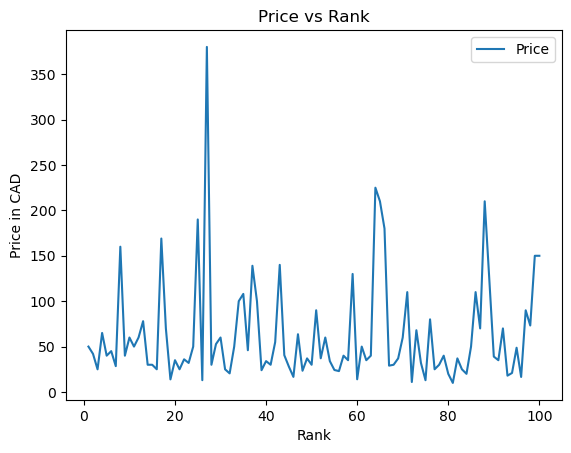

In [51]:
# Plot a line plot with 'price' on the y-axis and 'rank' on the x-axis
plt.plot(bestsellers_df['rank'], bestsellers_df['price'], label='Price')

# Add a legend to the plot
plt.legend()

# Add a title
plt.title('Price vs Rank')

# Add axis labels
plt.ylabel('Price in CAD')
plt.xlabel('Rank')

# Show the plot
plt.show()

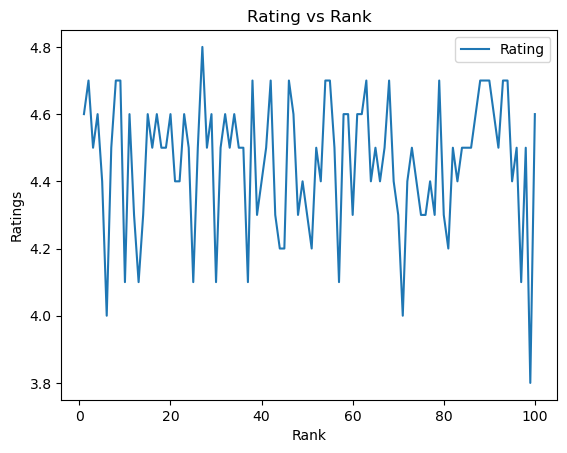

In [52]:
# Plot a line plot with 'rating' on the y-axis and 'rank' on the x-axis
plt.plot(bestsellers_df['rank'], bestsellers_df['rating'], label='Rating')

# Add a legend to the plot
plt.legend()

# Add a title
plt.title('Rating vs Rank')

# Add axis labels
plt.ylabel('Ratings')
plt.xlabel('Rank')

# Show the plot
plt.show()

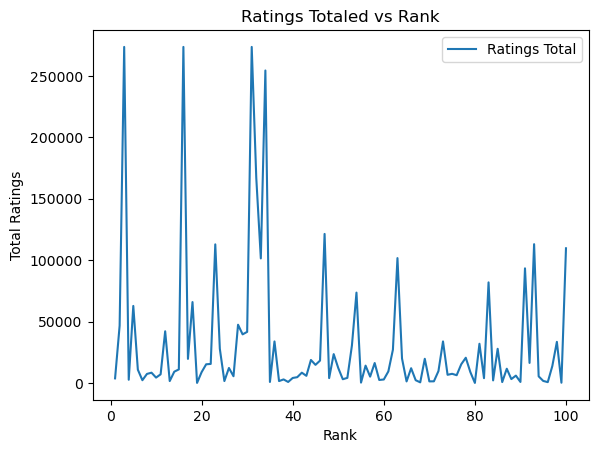

In [53]:
# Plot a line plot with 'ratings_total' on the y-axis and 'rank' on the x-axis
plt.plot(bestsellers_df['rank'], bestsellers_df['ratings_total'], label='Ratings Total')

# Add a legend to the plot
plt.legend()

# Add a title
plt.title('Ratings Totaled vs Rank')

# Add axis labels
plt.ylabel('Total Ratings')
plt.xlabel('Rank')

# Show the plot
plt.show()